# Visualizing Chipotle's Data

This time we are going to pull data directly from the internet.
Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.

### Step 1. Import the necessary libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# set this so the graphs open internally
%matplotlib inline

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv). 

### Step 3. Assign it to a variable called chipo.

In [48]:
chipo = pd.read_csv("https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv", sep="\t")

### Step 4. See the first 10 entries

In [49]:
chipo.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


### Step 5. Create a histogram of the top 5 items bought

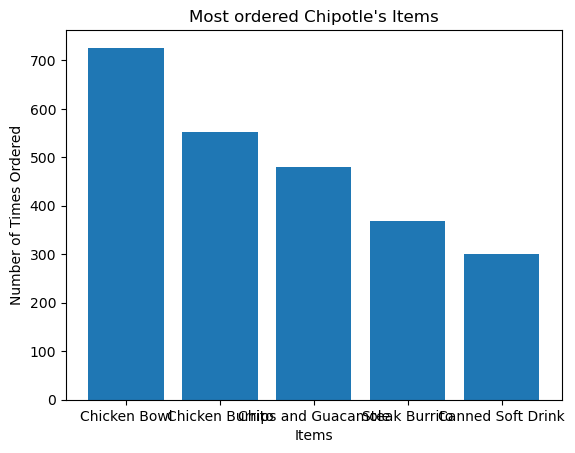

In [50]:
item_count = Counter(chipo.item_name)
top_5 = item_count.most_common(5)
top_5_df = pd.DataFrame(top_5, columns=["item_name", "count"])
top_5_df.set_index("item_name")

fig, ax = plt.subplots()
ax.bar(top_5_df.item_name, top_5_df["count"])

plt.xlabel('Items')
plt.ylabel('Number of Times Ordered')
plt.title('Most ordered Chipotle\'s Items')

plt.show()

### Step 6. Create a scatterplot with the number of items orderered per order price
#### Hint: Price should be in the X-axis and Items ordered in the Y-axis

C:\Users\emmap\AppData\Local\Temp\ipykernel_14348\1895157487.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  chipo_grouped = chipo.groupby(by='order_id').sum()


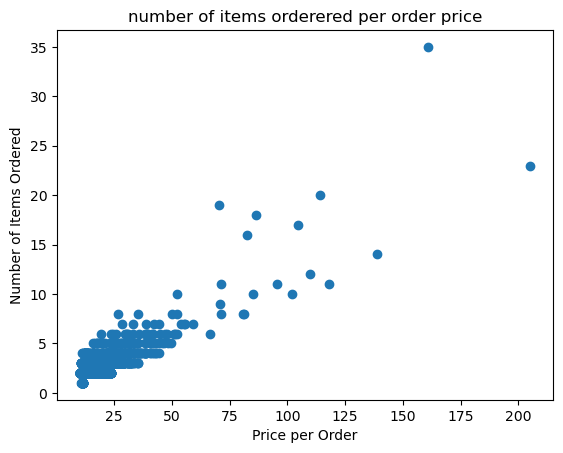

In [51]:
chipo["item_price"] =  [float(x[1:]) for x in chipo.item_price]
chipo_grouped = chipo.groupby(by='order_id').sum()

x = chipo_grouped["item_price"]
y = chipo_grouped["quantity"]

plt.scatter(x,y)
plt.xlabel('Price per Order')
plt.ylabel('Number of Items Ordered')
plt.title('number of items orderered per order price')
plt.show()

### Step 7. BONUS: Create a question and a graph to answer your own question.